In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats

In [5]:
dataset = pd.read_csv("ML Task 4 dataset CarPrice_Assignment.csv")
df = pd.DataFrame(dataset)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
duplicates = df.duplicated()
print("Duplicate rows:")
print(df[duplicates])

num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Duplicate rows:
Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]
Number of duplicate rows: 0


In [17]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### Length of unique values in each column.


In [19]:
for column in df.columns:
    unique_values = df[column].unique()  # Get unique values
    unique_count = df[column].nunique()  # Get number of unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {unique_count}\n")

Column: car_ID
Unique Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
Number of Unique Values: 205

Column: symboling
Unique Values: [ 3  1  2  0 -1 -2]
Number of Unique Values: 6

Column: CarName
Unique Val

In [21]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print(f"Number of Unique Values: {df[column].nunique()}\n")

Column: car_ID
car_ID
1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: count, Length: 205, dtype: int64
Number of Unique Values: 205

Column: symboling
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
Number of Unique Values: 6

Column: CarName
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64
Number of Unique Values: 147

Column: fueltype
fueltype
gas       185
diesel     20
Name: count, dtype: int64
Number of Unique Values: 2

Column: aspiration
aspiration
std      168
turbo     37
Name: count, dtype: int64
Number of Unique Values: 2

Column: doornumber
doornumber
four    115
two      90
Name: count, dtype: int

In [23]:
# Get basic statistics for numerical features
summary_statistics = df.describe()
print(summary_statistics)

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [25]:
# Calculate mode for each numerical feature
modes = df.mode().iloc[0]
print("Mode for each feature:",modes)


Mode for each feature: car_ID                        1
symboling                   0.0
CarName             peugeot 504
fueltype                    gas
aspiration                  std
doornumber                 four
carbody                   sedan
drivewheel                  fwd
enginelocation            front
wheelbase                  94.5
carlength                 157.3
carwidth                   63.8
carheight                  50.8
curbweight               2385.0
enginetype                  ohc
cylindernumber             four
enginesize                 92.0
fuelsystem                 mpfi
boreratio                  3.62
stroke                      3.4
compressionratio            9.0
horsepower                 68.0
peakrpm                  5500.0
citympg                    31.0
highwaympg                 25.0
price                    5572.0
Name: 0, dtype: object


In [27]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### Detecting Outliers Using IQR (Interquartile Range)

In [29]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1

print("Q1:\n", Q1)
print("Q3:\n",Q3)
print("IQR:\n", IQR)

Q1:
 7788.0
Q3:
 16503.0
IQR:
 8715.0


In [31]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:\n", lower_bound)
print("Upper Bound:\n", upper_bound)

Lower Bound:
 -5284.5
Upper Bound:
 29575.5


### Identify Outliers

In [33]:
df_iqr_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [35]:
df_cleaned = df_iqr_filtered

#### Final Check

In [37]:
print(df_cleaned.info())
print(df_cleaned.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            190 non-null    int64  
 1   symboling         190 non-null    int64  
 2   CarName           190 non-null    object 
 3   fueltype          190 non-null    object 
 4   aspiration        190 non-null    object 
 5   doornumber        190 non-null    object 
 6   carbody           190 non-null    object 
 7   drivewheel        190 non-null    object 
 8   enginelocation    190 non-null    object 
 9   wheelbase         190 non-null    float64
 10  carlength         190 non-null    float64
 11  carwidth          190 non-null    float64
 12  carheight         190 non-null    float64
 13  curbweight        190 non-null    int64  
 14  enginetype        190 non-null    object 
 15  cylindernumber    190 non-null    object 
 16  enginesize        190 non-null    int64  
 17  fu

### Detecting Outliers Using Z-Score

#### Z-Score Method: Filters outliers by checking how far each data point is from the mean in terms of standard deviations.
IQR Method: Filters outliers by identifying points that fall outside of the typical range defined by the quartiles.

In [101]:
#z_scores = stats.zscore(df['price'])
#df_z_filtered = df[(z_scores < 3)]

In [39]:
z_scores = stats.zscore(df.select_dtypes(include=[float, int]))  # Apply to numerical columns
abs_z_scores = abs(z_scores)

print("Z-Scores:\n", abs_z_scores)

Z-Scores:
        car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
0    1.723622   1.743470   1.690772   0.426521  0.844782   2.020417   
1    1.706724   1.743470   1.690772   0.426521  0.844782   2.020417   
2    1.689826   0.133509   0.708596   0.231513  0.190566   0.543527   
3    1.672928   0.938490   0.173698   0.207256  0.136542   0.235942   
4    1.656029   0.938490   0.107110   0.207256  0.230001   0.235942   
..        ...        ...        ...        ...       ...        ...   
200  1.656029   1.476452   1.721873   1.198549  1.398245   0.728239   
201  1.672928   1.476452   1.721873   1.198549  1.351515   0.728239   
202  1.689826   1.476452   1.721873   1.198549  1.398245   0.728239   
203  1.706724   1.476452   1.721873   1.198549  1.398245   0.728239   
204  1.723622   1.476452   1.721873   1.198549  1.398245   0.728239   

     curbweight  enginesize  boreratio    stroke  compressionratio  \
0      0.014566    0.074449   0.519071  1.839377          0.288349

In [41]:
# Identify outliers where Z-score > 3
outliers = (abs_z_scores > 3).any(axis=1)
print("Outliers:\n", df[outliers])

Outliers:
      car_ID  symboling                          CarName fueltype aspiration  \
16       17          0                           bmw x5      gas        std   
18       19          2                 chevrolet impala      gas        std   
30       31          2                      honda civic      gas        std   
47       48          0                        jaguar xj      gas        std   
48       49          0                        jaguar xf      gas        std   
49       50          0                        jaguar xk      gas        std   
63       64          0                 mazda glc deluxe   diesel        std   
73       74          0            buick century special      gas        std   
74       75          1  buick regal sport coupe (turbo)      gas        std   
90       91          1                      nissan gt-r   diesel        std   
111     112          0                      peugeot 504      gas        std   
113     114          0                   

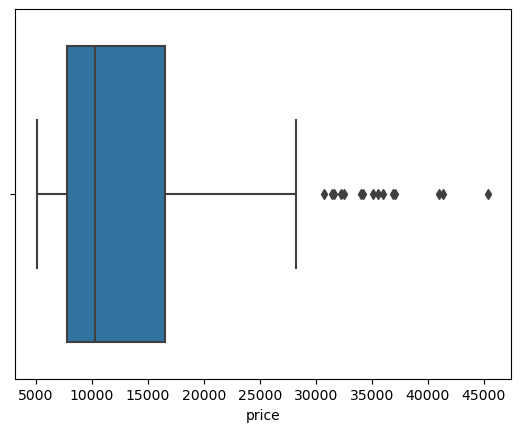

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['price'])
plt.show()

In [45]:
z_scores = stats.zscore(df['price'])

df_z_filtered = df[(z_scores < 3)]
print(df_z_filtered)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [47]:
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])

In [49]:
df.drop(columns=['car_ID'], inplace=True)

In [51]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [53]:
categorical_columns = ['fueltype', 'CarName', 'aspiration', 'doornumber','carbody','drivewheel','enginelocation','fuelsystem']  # Update with actual column names

# Find unique values in each categorical column
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in fueltype: ['gas' 'diesel']
Unique values in CarName: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick c

 #### Visualizing Categorical Columns with Count Plots
You can use Seaborn's countplot() function to create count plots for each categorical column.
Count plots display the frequency of each unique value in a categorical column.

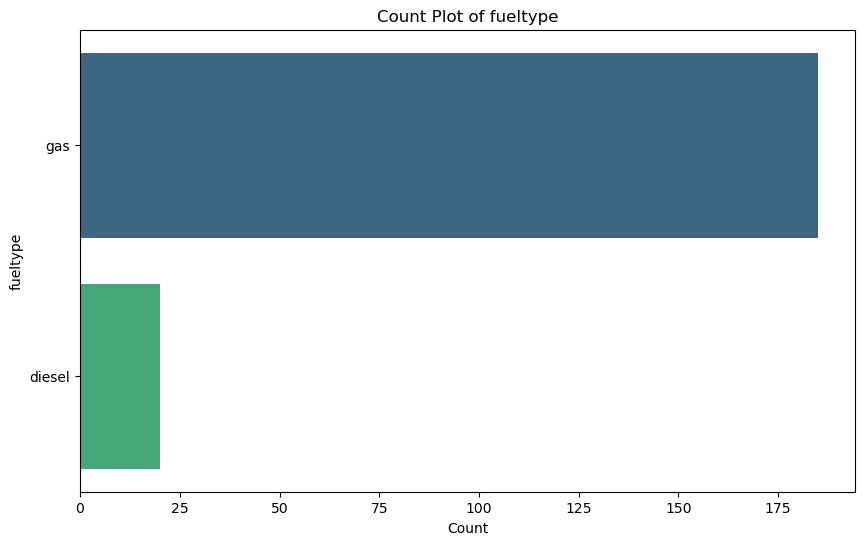

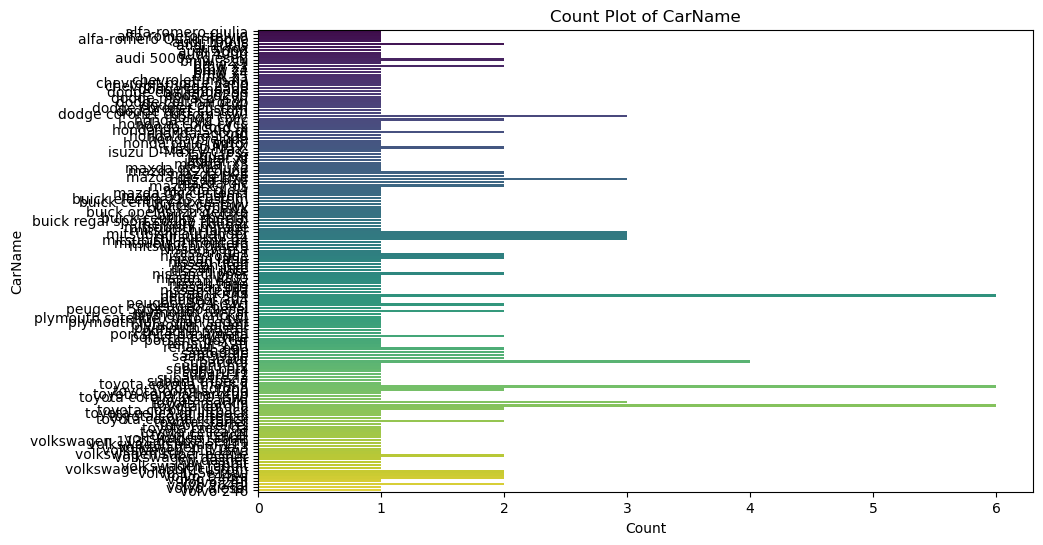

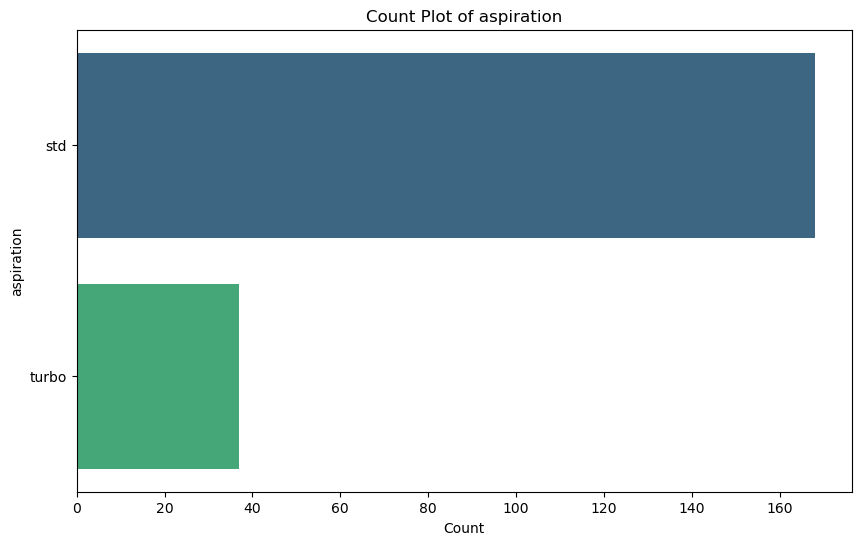

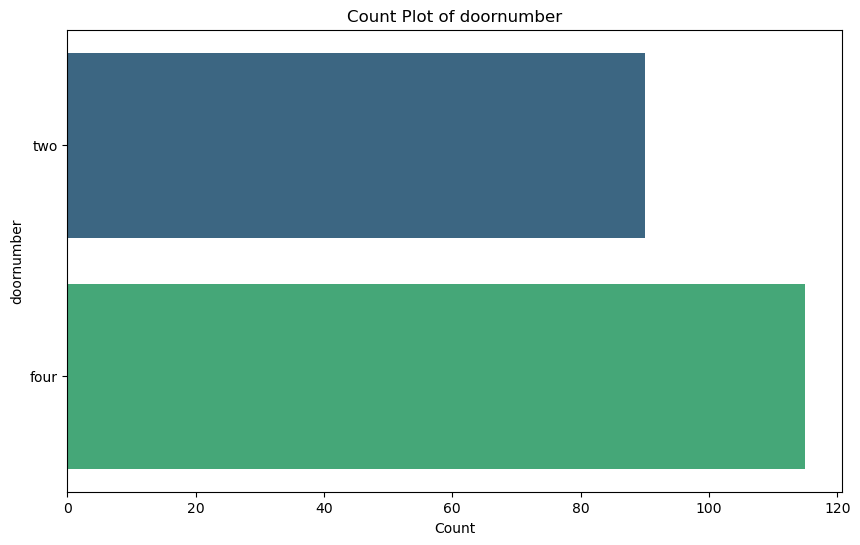

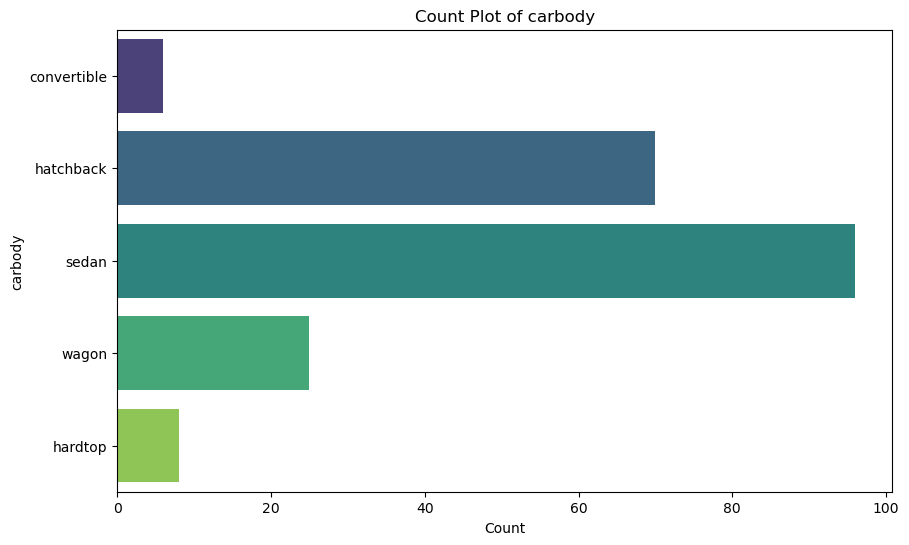

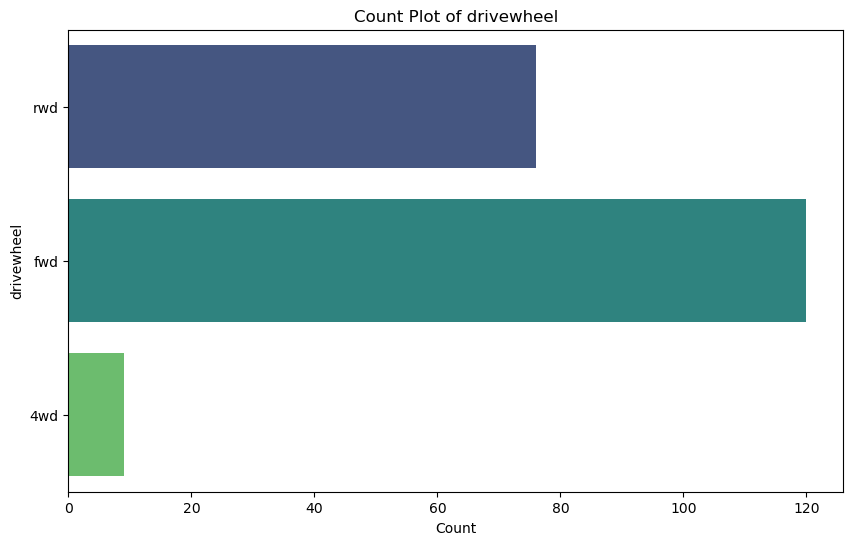

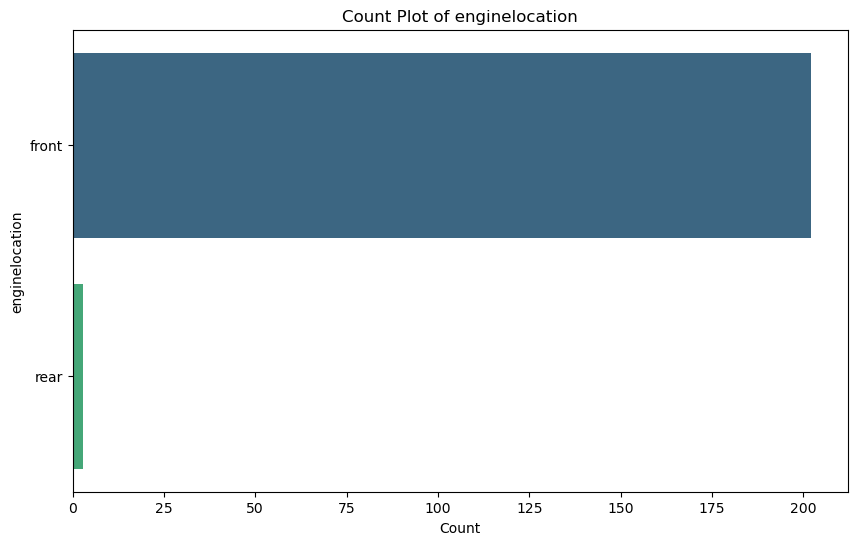

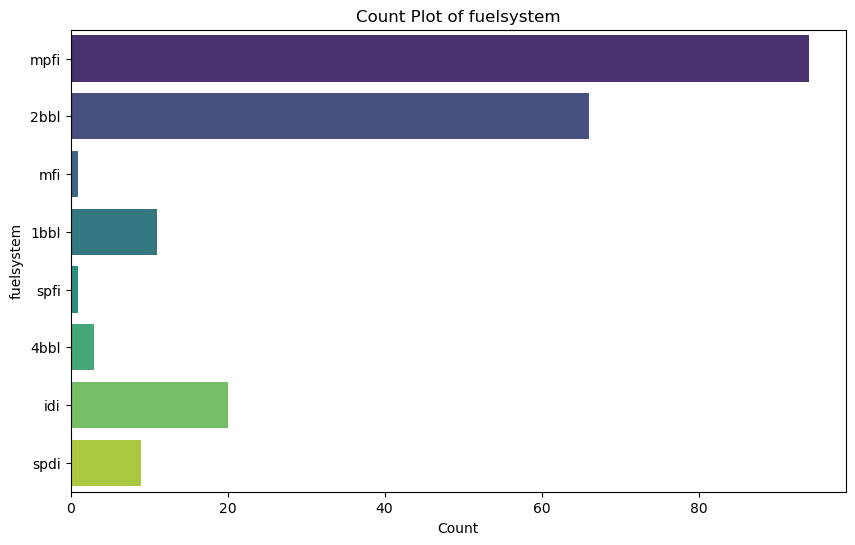

In [55]:
# Plot count plots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))  
    sns.countplot(y=col, data=df, palette="viridis")  # Change 'y' to 'x' for horizontal bars
    plt.title(f"Count Plot of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

In [73]:
df['Company_Name'] = df['CarName'].str.split(' ').str[0]
print(df[['CarName', 'Company_Name']])

                      CarName Company_Name
0          alfa-romero giulia  alfa-romero
1         alfa-romero stelvio  alfa-romero
2    alfa-romero Quadrifoglio  alfa-romero
3                 audi 100 ls         audi
4                  audi 100ls         audi
..                        ...          ...
200           volvo 145e (sw)        volvo
201               volvo 144ea        volvo
202               volvo 244dl        volvo
203                 volvo 246        volvo
204               volvo 264gl        volvo

[205 rows x 2 columns]


In [77]:
print(df[['CarName','Company_Name']].head())

                    CarName Company_Name
0        alfa-romero giulia  alfa-romero
1       alfa-romero stelvio  alfa-romero
2  alfa-romero Quadrifoglio  alfa-romero
3               audi 100 ls         audi
4                audi 100ls         audi


#### Correct spelling mistakes

In [88]:
print(df['Company_Name'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [92]:
df['Company_Name'] = df['Company_Name'].replace({'alfa-romero':'Alfa romeo','audi': 'Audi' , 'bmw': 'Bmw', 'chevrolet': 'Chevrolet', 
                                                 'dodge' :'Dodge', 'honda' :'Honda' , 'isuzu':'Isuzu', 'jaguar':'Jaguar',
 'maxda':'Mazda', 'mazda':'Mazda', 'buick':'Buick', 'mercury':'Mercury' ,'mitsubishi':'Mitsubishi', 'Nissan':'Nissan', 'nissan':'Nissan',
 'peugeot': 'Peugeot', 'plymouth':'Plymouth', 'porsche':'Porsche', 'porcshce': 'Porsche', 'renault':'Renault' , 'saab':'Saab' ,'subaru':'Subaru',
 'toyota':'Toyota', 'toyouta':'Toyota' ,'vokswagen':'Volkswagen', 'volkswagen':'Volkswagen' ,'vw':'VW','volvo':'Volvo'})

In [102]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name
0,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa romeo
1,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa romeo
2,1,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa romeo
3,2,1,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi
4,2,1,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,Volvo
201,-1,1,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,Volvo
202,-1,1,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,Volvo
203,-1,0,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,Volvo


In [ ]:
df.drop(columns=['CarName'], inplace=True)
df

In [116]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# Label encoding the categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
print(df.head())

Categorical columns: []
   symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3         1           0           1        0           2   
1          3         1           0           1        0           2   
2          1         1           0           1        2           2   
3          2         1           0           0        3           1   
4          2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0               0       88.6      168.8      64.1  ...           5       3.47   
1               0       88.6      168.8      64.1  ...           5       3.47   
2               0       94.5      171.2      65.5  ...           5       2.68   
3               0       99.8      176.6      66.2  ...           5       3.19   
4               0       99.4      176.6      66.4  ...           5       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  hig

In [108]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### Feature Selection

In [119]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                  symboling  fueltype  aspiration  doornumber   carbody  \
symboling          1.000000  0.194311   -0.059866    0.664073 -0.596135   
fueltype           0.194311  1.000000   -0.401397    0.191491 -0.147853   
aspiration        -0.059866 -0.401397    1.000000   -0.031792  0.063028   
doornumber         0.664073  0.191491   -0.031792    1.000000 -0.680358   
carbody           -0.596135 -0.147853    0.063028   -0.680358  1.000000   
drivewheel        -0.041671 -0.132257    0.066465    0.098954 -0.155745   
enginelocation     0.212471  0.040070   -0.057191    0.137757 -0.277009   
wheelbase         -0.531954 -0.308346    0.257611   -0.447357  0.401362   
carlength         -0.357612 -0.212679    0.234539   -0.398568  0.334433   
carwidth          -0.232919 -0.233880    0.300567   -0.207168  0.131710   
carheight         -0.541038 -0.284631    0.087311   -0.552208  0.568534   
curbweight        -0.227691 -0.217275    0.324902   -0.197379  0.128467   
enginetype         0.0503

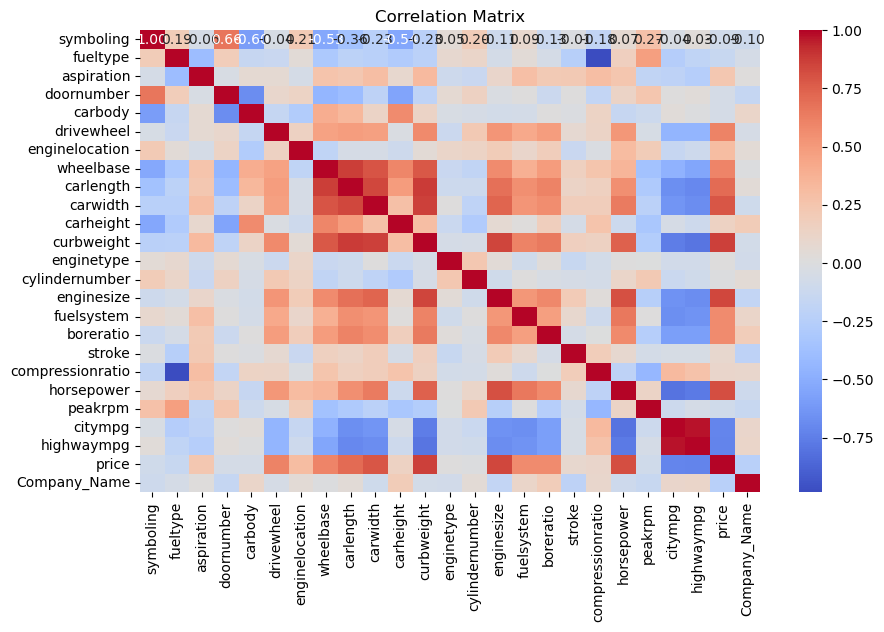

In [121]:
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.title('Correlation Matrix')
plt.show()

####  Identify Highly Correlated Features
Next, identify pairs of features with a correlation coefficient higher than a specified threshold (e.g., 0.85).

In [192]:


threshold = 0.85
high_corr_features = [col for col in correlation_matrix.columns if any(correlation_matrix[col] > threshold) and col != 'price']
df.drop(columns=high_corr_features, inplace=True)

In [194]:
 print(high_corr_pairs.unstack().dropna()) #Converts the matrix to a series and drops the NaN values, making it easier to read.

wheelbase   carlength     0.874587
carlength   wheelbase     0.874587
            curbweight    0.877728
carwidth    curbweight    0.867032
curbweight  carlength     0.877728
            carwidth      0.867032
            enginesize    0.850594
            price         0.864597
enginesize  curbweight    0.850594
citympg     highwaympg    0.971337
highwaympg  citympg       0.971337
price       curbweight    0.864597
dtype: float64


In [198]:
columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold and col != 'price':
            colname = correlation_matrix.columns[i]  # Get the name of the clumn
            columns_to_drop.add(colname)

# Drop the identified columns
df_reduced = df.drop(columns=columns_to_drop)

# Display the reduced DataFrame
print("Columns removed due to high correlation:", columns_to_drop)
print(df_reduced.head(10))

Columns removed due to high correlation: set()
       price
0  13495.000
1  16500.000
2  16500.000
3  13950.000
4  17450.000
5  15250.000
6  17710.000
7  18920.000
8  23875.000
9  17859.167


In [200]:
print("Remaining columns after removing multicollinear features:")
print(df_reduced.columns)

Remaining columns after removing multicollinear features:
Index(['price'], dtype='object')


In [202]:
df_reduced

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [134]:
from sklearn.model_selection import train_test_split

In [204]:
X = df_reduced.drop(['price'], axis=1) 
y = df_reduced['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

### Model Selection and Implementation

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Linear Regression:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)

In [ ]:
# Decision Tree Regressor:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
#Random Forest Regressor:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
#Gradient Boosting Regressor:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [ ]:
#Support Vector Regressor:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

### Model Evaluation

In [ ]:

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_dt, rmse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
mse_gb, rmse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
mse_svr, rmse_svr, r2_svr = evaluate_model(y_test, y_pred_svr)

print("\nLinear Regression: MSE =", mse_lr, "; RMSE =", rmse_lr, "; R² =", r2_lr)
print("\nDecision Tree: MSE =", mse_dt, "; RMSE =", rmse_dt, "; R² =", r2_dt)
print("\nRandom Forest: MSE =", mse_rf, "; RMSE =", rmse_rf, "; R² =", r2_rf)
print("\nGradient Boosting: MSE =", mse_gb, "; RMSE =", rmse_gb, "; R² =", r2_gb)
print("\nSupport Vector Regressor: MSE =", mse_svr, "; RMSE =", rmse_svr, "; R² =", r2_svr)
